# Technology stock market analysis

### I. First, import modules need

In [1]:
import pandas as pd
import yfinance as yf
import seaborn as sns
import matplotlib.pyplot as plt

The above libraries are quite enough to visualize the data. To make the interface more user-friendly and interactive, I will use the following libraries:

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp
import webbrowser

### II. Next, data stock price collection
I use `yfinance` package to data stock price collection:

In [3]:
symbol = "1810.HK"
df = yf.Ticker(symbol).history(period = "1y").reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df

Date       Open       High        Low      Close  \
0   2024-06-20 00:00:00+08:00  18.500000  18.719999  18.299999  18.520000   
1   2024-06-21 00:00:00+08:00  18.280001  18.400000  17.840000  18.180000   
2   2024-06-24 00:00:00+08:00  17.959999  18.080000  17.559999  18.020000   
3   2024-06-25 00:00:00+08:00  18.080000  18.139999  17.620001  17.780001   
4   2024-06-26 00:00:00+08:00  17.580000  17.940001  17.540001  17.820000   
..                        ...        ...        ...        ...        ...   
241 2025-06-16 00:00:00+08:00  51.950001  54.500000  51.500000  54.150002   
242 2025-06-17 00:00:00+08:00  54.200001  54.500000  53.599998  54.000000   
243 2025-06-18 00:00:00+08:00  53.750000  54.200001  53.450001  53.799999   
244 2025-06-19 00:00:00+08:00  53.599998  54.099998  52.700001  53.049999   
245 2025-06-20 00:00:00+08:00  53.250000  54.049999  53.000000  54.049999   

        Volume  Dividends  Stock Splits  
0     90185310        0.0           0.0  
1     87851069        0.0           0.0  
2     69977040        0.0           0.0  
3     58116612        0.0           0.0  
4     44582518        0.0           0.0  
..         ...        ...           ...  
241  220357669        0.0           0.0  
242   71275572        0.0           0.0  
243   64270680        0.0           0.0  
244   92603544        0.0           0.0  
245   88197055        0.0           0.0  

[246 rows x 8 columns]

For ease of data checking, I save the data to .csv file.

In [5]:
df.to_csv("xiaomi_stock_price.csv", index= False)

Draw closing price chart:

In [4]:
fig = px.line(df, x='Date', y='Close', title=f'{symbol} Stock Price')
fig.update_traces(mode='lines+markers')
fig.update_layout(
    title={'text': f'{symbol} Stock Price', 'x': 0.5},
    xaxis_title='Date',
    yaxis_title='Price (HKD)'
)
fig.write_html("xiaomi_stock_plot.html")
webbrowser.open("xiaomi_stock_plot.html")

True

### III. Data cleaning and processing
#### 1. Checking missing value
According to the official announcement from HKEX, the exchange conducts trading on Mondays to Fridays, except for Hong Kong holidays. On these holidays, the total trading volume (Volume) will be 0. Although the yfinance library has eliminated non-trading days, we still need to check to see if there are any non-trading days on the exchange to eliminate them.

In [15]:
dt = df[df['Volume'] == 0]
dt

Date       Open       High        Low      Close  \
129 2024-12-24 00:00:00+08:00  32.900002  32.900002  32.900002  32.900002   
132 2024-12-31 00:00:00+08:00  34.650002  34.650002  34.650002  34.650002   
151 2025-01-28 00:00:00+08:00  38.150002  38.150002  38.150002  38.150002   

     Volume  Dividends  Stock Splits  
129       0        0.0           0.0  
132       0        0.0           0.0  
151       0        0.0           0.0

Proceed to remove days with total trading volume (Volume) = 0.

In [4]:
df = df[df['Volume'] > 0]

In addition, in HKEX trading sessions, there are half-day trading sessions, which will end at 12:00 noon instead of 16:00 as usual. This can make the total trading volume of stocks (Volume) lower than usual. Trading sessions can also be interrupted when the market index drops sharply in a short period of time (Circurt break), when there are technical problems or natural disasters. All of the above unusual interruptions will more or less affect the indexes, especially Volume. We also need to remove this data.

HKEX provides an annual trading calendar. From this calendar, we can identify the half-day sessions during the survey period, including:

| date       | note                    | type     |
|------------|-------------------------|----------|
| 2020-12-24 | Christmas Eve           | half-day |
| 2020-12-31 | New Year’s Eve          | half-day |
| 2021-02-09 | Lunar New Year’s Eve    | half-day |
| 2021-12-24 | Christmas Eve           | half-day |
| 2021-12-31 | New Year’s Eve          | half-day |
| 2022-01-31 | Lunar New Year’s Eve    | half-day |
| 2024-02-09 | Lunar New Year’s Eve    | half-day |
| 2024-12-24 | Christmas Eve           | half-day |
| 2024-12-31 | New Year’s Eve          | half-day |
| 2025-01-28 | Lunar New Year’s Eve    | half-day |
| 2025-12-24 | Christmas Eve           | half-day |
| 2025-12-31 | New Year’s Eve          | half-day |


Proceed to remove these dates from the data:

In [5]:
half_day_dates = [
    "2020-12-24", "2020-12-31", "2021-02-09", "2021-12-24", "2021-12-31",
    "2022-01-31", "2024-02-09", "2024-12-24", "2024-12-31",
    "2025-01-28", "2025-12-24", "2025-12-31"
]
half_day_dates = pd.to_datetime(half_day_dates)

df_filtered = df[~df['Date'].isin(half_day_dates)]
df = df_filtered

df.head()

Date       Open       High        Low      Close  \
0 2024-06-20 00:00:00+08:00  18.500000  18.719999  18.299999  18.520000   
1 2024-06-21 00:00:00+08:00  18.280001  18.400000  17.840000  18.180000   
2 2024-06-24 00:00:00+08:00  17.959999  18.080000  17.559999  18.020000   
3 2024-06-25 00:00:00+08:00  18.080000  18.139999  17.620001  17.780001   
4 2024-06-26 00:00:00+08:00  17.580000  17.940001  17.540001  17.820000   

     Volume  Dividends  Stock Splits  
0  90185310        0.0           0.0  
1  87851069        0.0           0.0  
2  69977040        0.0           0.0  
3  58116612        0.0           0.0  
4  44582518        0.0           0.0

#### 2. Checking duplicate:

In [6]:
if (df.duplicated().sum()) == 0:
    print("Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng")
else:
    print("Dữ liệu có giá trị thiếu")    

Dữ liệu không có giá trị trùng nên không cần loại bỏ dòng


#### 3. Convert date column to date time format

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

#### 4. Checking outliers


Since all the anomalies due to objective factors (exchange, trading time) have been eliminated, the exceptions (if any) are due to unexpected increases and decreases in value due to the movement that do not reflect the real value of the stock. Check if there is any value:

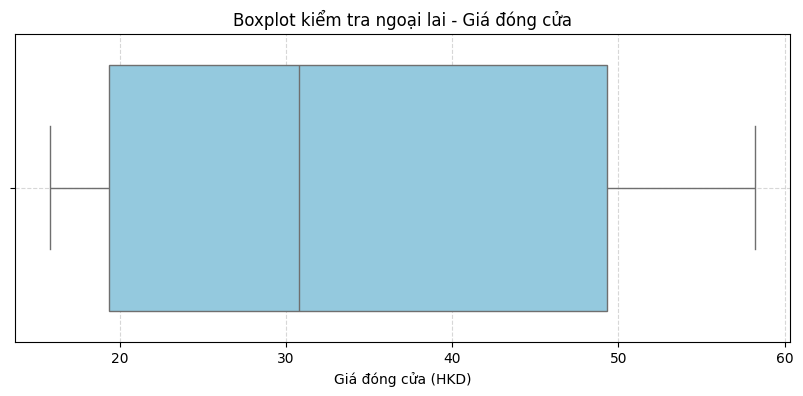

In [21]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Close'], color='skyblue')
plt.title('Boxplot kiểm tra ngoại lai - Giá đóng cửa')
plt.xlabel('Giá đóng cửa (HKD)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


#### 5. After the data cleaning and processing steps, we conclude: ####

The data collected from the `yfinance` library for Xiaomi Corp stock code (`1810.HK`) has all the necessary columns: `Date`, `Open`, `High`, `Low`, `Close`, `Volume`. Preliminary checks:

- No missing values ​​(`NaN`) are displayed in important columns.

- No outliers are identified in the data.

- The `Date` column is already in the standard `ISO 8601` time format and is converted to `date time` type in Python for time analysis.

**Therefore, no additional removal or processing is required. The data is available for further calculations and analysis.**

In [ ]:
df.to_csv("xiaomi_stock_price_after cleaning and processing.csv", index= False)

### IV. Basic technical indicator calculation:
#### 1. Simple moving average **SMA** with 20-day, 50-day intervals:

In [6]:
df['SMA20'] = df['Close'].rolling(window=20).mean()
df['SMA50'] = df['Close'].rolling(window=50).mean()

#### 2. Exponential moving average **EMA** with 20-day interval:

In [7]:
df['EMA20'] = df['Close'].ewm(span=20, adjust=False).mean()

Find the SMA Crossover Point (Golden/Death Cross)

In [ ]:
df['Signal'] = 0
df.loc[(df['SMA20'] > df['SMA50']) & (df['SMA20'].shift(1) <= df['SMA50'].shift(1)), 'Signal'] = 1
df.loc[(df['SMA20'] < df['SMA50']) & (df['SMA20'].shift(1) >= df['SMA50'].shift(1)), 'Signal'] = -1

golden_cross = df[df['Signal'] == 1]
death_cross = df[df['Signal'] == -1]

- The chart can show the correlation between the closing price, SMA and EMA:

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'], name='SMA20', line=dict(color='green', dash='dash')))
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA50'], name='SMA50', line=dict(color='orange', dash='dash')))

fig.add_trace(go.Scatter(x=df['Date'], y=df['EMA20'], name='EMA20', line=dict(color='magenta', dash='dot')))

fig.add_trace(go.Scatter(
    x=golden_cross['Date'], y=golden_cross['Close'],
    mode='markers', marker=dict(color='green', size=10, symbol='triangle-up'), name='Golden Cross'
))
fig.add_trace(go.Scatter(
    x=death_cross['Date'], y=death_cross['Close'],
    mode='markers', marker=dict(color='red', size=10, symbol='triangle-down'), name='Death Cross'
))

fig.update_layout(
    title={'text': f"SMA & EMA của {symbol} và điểm giao cắt", 'x': 0.5},
    xaxis_title='Ngày',
    yaxis_title='Giá (HKD)',
    hovermode='x unified',
    template='plotly_white'
)

fig.write_html("close price, SMA and EMA.html")
webbrowser.open("close price, SMA and EMA.html")

#### 3. Relative Strength Index **RSI**:

In [8]:
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = delta.clip(lower=0)
    loss = -1 * delta.clip(upper=0)
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = compute_rsi(df['Close'])


Identify overbought/oversold conditions

In [25]:
overbought = df[df['RSI'] > 70]
oversold = df[df['RSI'] < 30]

- The chart can show the correlation between SMA, RSI:

In [29]:
fig = sp.make_subplots(
    rows=2, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.08,
    subplot_titles=("Giá và SMA", "RSI (14 ngày)")
)

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], name='Close', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA20'], name='SMA20', line=dict(color='green', dash='dash')), row=1, col=1)
fig.add_trace(go.Scatter(x=df['Date'], y=df['SMA50'], name='SMA50', line=dict(color='orange', dash='dash')), row=1, col=1)

fig.add_trace(go.Scatter(x=df['Date'], y=df['RSI'], name='RSI', line=dict(color='purple')), row=2, col=1)

fig.add_hline(y=70, line_dash="dash", line_color='red', row=2, col=1)
fig.add_hline(y=30, line_dash="dash", line_color='green', row=2, col=1)

fig.add_trace(go.Scatter(
    x=overbought['Date'], y=overbought['RSI'], mode='markers', name='Overbought',
    marker=dict(color='red', size=8, symbol='triangle-down')
), row=2, col=1)
fig.add_trace(go.Scatter(
    x=oversold['Date'], y=oversold['RSI'], mode='markers', name='Oversold',
    marker=dict(color='green', size=8, symbol='triangle-up')
), row=2, col=1)

fig.update_layout(
    title={'text': f"Phân tích cổ phiếu {symbol}: Giá + SMA và RSI (14 ngày)", 'x': 0.5},
    hovermode='x unified',
    template='plotly_white',
    height=800
)

fig.write_html("SMA_RSI.html")
webbrowser.open("SMA_RSI.html")

True

- Correlation heatmap chart

In [ ]:
corr_df = df[['Close', 'SMA20', 'SMA50', 'EMA20', 'Daily Return']].dropna()
correlation_matrix = corr_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap ma trận tương quan các chỉ số kỹ thuật')
plt.tight_layout()
plt.show()

### V. Data analysis:

#### 1. Calculating daily returns, return distribution:
Daily returns are calculated as the percentage change between the closing price of the current day and the previous day. Daily returns help to assess the short-term price increase/decrease rate.
The variable `Daily Return` is added to analyze returns and volatility.

In [9]:
df['Daily Return'] = df['Close'].pct_change()

Distribute the yield using Histogram to see which range the yield falls within and how it is distributed.

Formula used:

$$
r_t = \frac{P_t - P_{t-1}}{P_{t-1}}
$$

- Daily yield chart:

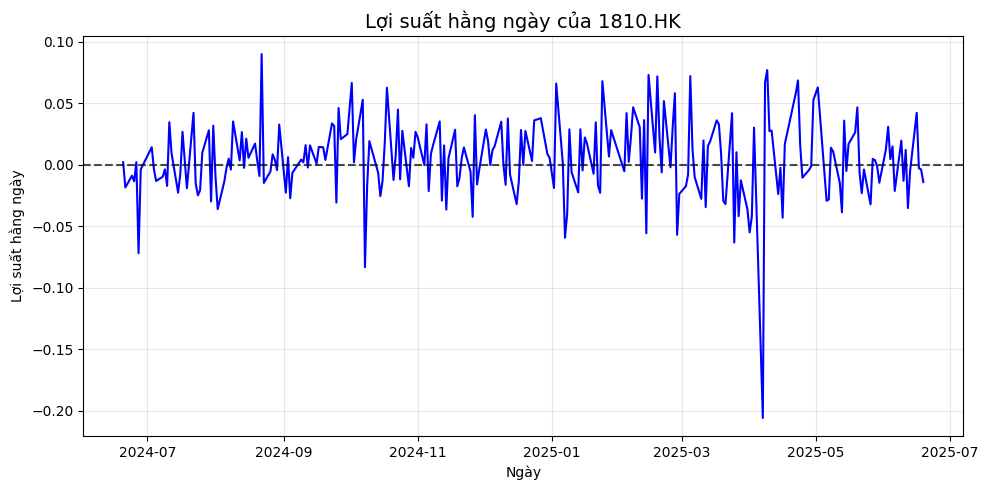

In [17]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Daily Return'], color='blue')
plt.axhline(0, color='black', linestyle='--', alpha=0.7)
plt.title(f'Lợi suất hằng ngày của {symbol}', fontsize=14)
plt.xlabel('Ngày')
plt.ylabel('Lợi suất hằng ngày')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

- Histogram

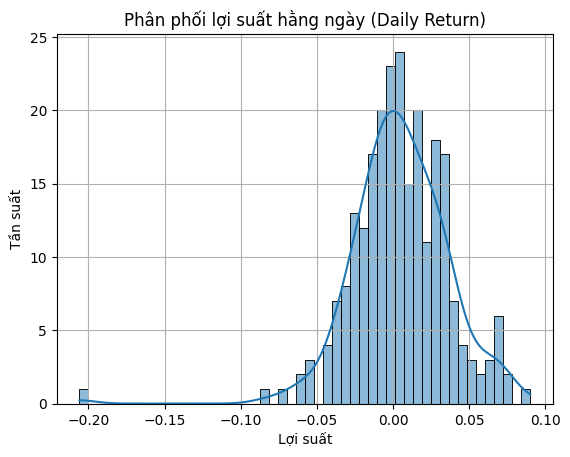

In [10]:
sns.histplot(df['Daily Return'].dropna(), bins=50, kde=True)
plt.title('Phân phối lợi suất hằng ngày (Daily Return)')
plt.xlabel('Lợi suất')
plt.ylabel('Tần suất')
plt.grid(True)
plt.show()


#### 2. Calculate the volatility (variability) by month or quarter:

- Monthly/quarterly volatility is calculated by the difference in the constant interest in each month/quarter. Through this, it is possible to identify periods of strong stock price fluctuations.

Since the survey period is neither too short nor too long (1 year), we will prioritize calculating monthly volatility to easily track the data.

In [19]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_volatility = df.groupby('Month')['Daily Return'].std()
display(monthly_volatility)

C:\Users\tran huu duong\AppData\Local\Temp\ipykernel_12864\3088838682.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



Month
2024-06    0.025812
2024-07    0.021472
2024-08    0.024859
2024-09    0.020323
2024-10    0.034029
2024-11    0.023621
2024-12    0.020026
2025-01    0.033143
2025-02    0.037978
2025-03    0.033267
2025-04    0.064071
2025-05    0.027099
2025-06    0.020861
Freq: M, Name: Daily Return, dtype: float64

- The chart can show volatility:

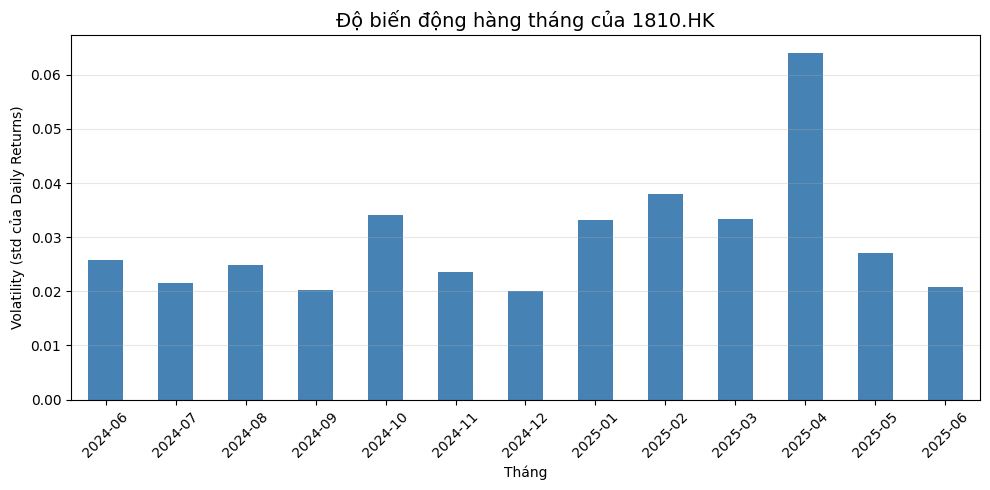

In [20]:
plt.figure(figsize=(10,5))
monthly_volatility.plot(kind='bar', color='steelblue')
plt.title(f'Độ biến động hàng tháng của {symbol}', fontsize=14)
plt.ylabel('Volatility (std của Daily Returns)')
plt.xlabel('Tháng')
plt.grid(axis='y', alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Chart showing total trading volume

In [9]:
fig = px.bar(df, x='Date', y='Volume',
             title=f'Khối lượng giao dịch cổ phiếu {symbol}',
             labels={'Volume': 'Volume', 'Date': 'Ngày'},
             template='plotly_white')

fig.update_layout(title_x=0.5)

fig.write_html("Trading_Volume.html")
webbrowser.open("Trading_Volume.html")

True